######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#4135c3">Time Series
<font color=darkblue>
<fr>
    
- This is simple and effective time series Machine Learning algorithm and more on this next week
    
######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#54c335">Importing Python Libraries we need
<font color=darkblue>  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
import seaborn as sns

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#a7c335">Load the dataset using URL and display
<font color=darkblue>      


In [2]:
Df = pd.read_csv("~/Desktop/Analysis/Work/ML_EIT/Data/Electric_Production.csv")
Df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [3]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#a7c335">Data Shape
<font color=darkblue> 

In [4]:
Df.shape

(397, 2)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c3a4">Data Describe

In [5]:
Df.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [9]:
######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#357ec3">rename columns

In [10]:
Df = Df.rename(columns = {'DATE': 'ds', 'IPG2211A2N':'ts'})
Df.head()

,ds,ts
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#3562c3">Table columns information

In [11]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      397 non-null    object 
 1   ts      397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35b0c3">Data Visualization

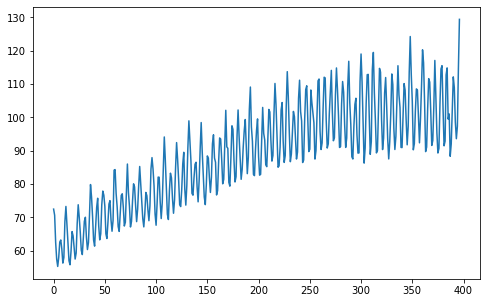

In [13]:
plt.figure(figsize=(8,5))
plt.plot(Df.ts)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a35c3">Stationarity Test

In [14]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(df, ts):
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """
    
    # Determing rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

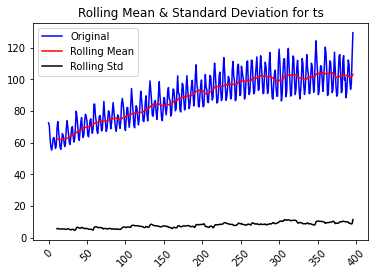

Results of Dickey-Fuller Test:
Test Statistic                  -2.256990
p-value                          0.186215
# Lags Used                     15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64


In [15]:
stationarity_test(Df,'ts')

In [16]:
def log_trans(df,ts):return df[ts].apply(lambda x:np.log(x))

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a35c3">Decomposition

In [18]:
def plot_decomposition(df, ts,trend,seasonal, residual):

    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

    ax1.plot(df[ts], label = 'Original')
    ax1.legend(loc = 'best')
    ax1.tick_params(axis = 'x', rotation = 45)

    ax2.plot(df[trend], label = 'Trend')
    ax2.legend(loc = 'best')
    ax2.tick_params(axis = 'x', rotation = 45)

    ax3.plot(df[seasonal],label = 'Seasonality')
    ax3.legend(loc = 'best')
    ax3.tick_params(axis = 'x', rotation = 45)

    ax4.plot(df[residual], label = 'Residuals')
    ax4.legend(loc = 'best')
    ax4.tick_params(axis = 'x', rotation = 45)
    plt.tight_layout()

#plt.subtitle('Signal Decomposition of %s' %(ts), x =0.5, y= 1.05, fontsize = 18)
plt.show()

In [19]:
Df["ts_log"]=  log_trans(Df,"ts")


In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Df["ts_log"],  model ="additive" ,freq=48, extrapolate_trend=4)

<ipython-input-20-6e240d52ead8>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(Df["ts_log"],  model ="additive" ,freq=48, extrapolate_trend=4)


In [21]:
New_Df= Df
New_Df.loc[:,"trend"]= decomposition.trend
New_Df.loc[:,"seasonal"]= decomposition.seasonal
New_Df.loc[:,"resid"] = decomposition.resid
New_Df.shape

(397, 6)

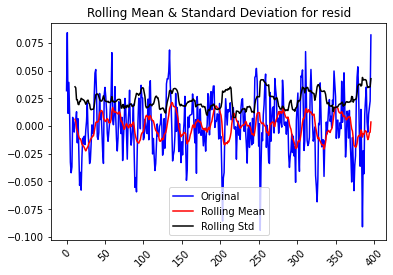

Results of Dickey-Fuller Test:
Test Statistic                -5.710560e+00
p-value                        7.316325e-07
# Lags Used                    1.500000e+01
Number of Observations Used    3.810000e+02
Critical Value (1%)           -3.447631e+00
Critical Value (5%)           -2.869156e+00
Critical Value (10%)          -2.570827e+00
dtype: float64


In [23]:
stationarity_test(New_Df, "resid")

In [24]:
decomposition.seasonal

0      0.140710
1      0.060143
2      0.006784
3     -0.106743
4     -0.119370
         ...   
392   -0.035025
393   -0.103407
394   -0.070384
395    0.087688
396    0.148382
Name: seasonal, Length: 397, dtype: float64

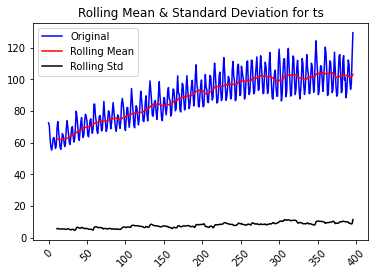

Results of Dickey-Fuller Test:
Test Statistic                  -2.256990
p-value                          0.186215
# Lags Used                     15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64


In [25]:
stationarity_test(New_Df, "ts")

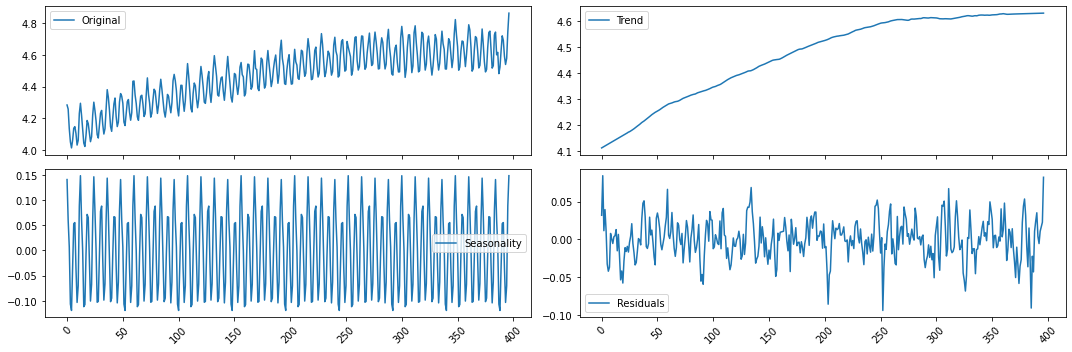

In [26]:
plot_decomposition(New_Df, ts = "ts_log",trend ="trend",seasonal= "seasonal",residual= "resid")

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a35c3">ARIMA Model

In [28]:
from statsmodels.tsa.arima_model import ARIMA

In [29]:
def run_arima(df,ts,p,d,q):
    model = ARIMA(df[ts], order=(p,d,q))
    results_arima = model.fit(disp=-1)
    
    len_results = len(results_arima.fittedvalues)
    ts_modified = df[ts][-len_results:]
    
    rss = sum((results_arima.fittedvalues - ts_modified)**2)
    rmse = np.sqrt(rss/len(df[ts]))
    
    print('rmse ',rmse/100)
    plt.figure()
    plt.plot(df[ts])
    plt.plot(results_arima.fittedvalues,color='red')
    
    plt.show()
    
    return results_arima
    

In [30]:
New_Df = New_Df.fillna(value=0)
# New_Df = New_Df.fillna(0)

rmse  0.0002077953831303392


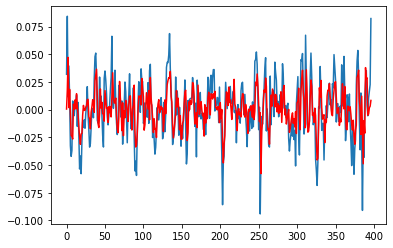

In [31]:
model_Ar = run_arima(df=New_Df, ts='resid',p=15, d=0, q=0)

In [32]:
model_Ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  resid   No. Observations:                  397
Model:                    ARMA(15, 0)   Log Likelihood                 975.445
Method:                       css-mle   S.D. of innovations              0.021
Date:                Sat, 15 May 2021   AIC                          -1916.890
Time:                        16:59:52   BIC                          -1849.164
Sample:                             0   HQIC                         -1890.062
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0005      0.001      0.396      0.692      -0.002       0.003
ar.L1.resid      0.5515      0.050     10.979      0.000       0.453       0.650
ar.L2.resid     -0.0538      0.058     -0.925      0.355      -0.168       0.060
ar.L3.resid      0.0362      0.058      0.625      0.532      -0.077       0.150
ar.L4.resid     -0.0838      0.058     -1.451      0.147      -0.197       0.029
ar.L5.resid     -0.0244      0.058     -0.423      0.672      -0.138       0.089
ar.L6.resid      0.0276      0.057      0.480      0.631      -0.085       0.140
ar.L7.resid     -0.0504      0.057     -0.881      0.379      -0.163       0.062
ar.L8.resid     -0.0643      0.057     -1.123      0.262      -0.177       0.048
ar.L9.resid     -0.1052      0.058     -1.826      0.068      -0.218       0.008
ar.L10.resid     0.1360      0.058      2.344      0.019       0.022       0.250
ar.L11.resid    -0.0168      0.059     -0.286      0.775      -0.132       0.098
ar.L12.resid     0.1372      0.059      2.306      0.021       0.021       0.254
ar.L13.resid    -0.1676      0.060     -2.804      0.005      -0.285      -0.050
ar.L14.resid     0.0525      0.061      0.864      0.387      -0.067       0.172
ar.L15.resid    -0.1720      0.053     -3.258      0.001      -0.276      -0.069
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0590           -0.2360j            1.0850           -0.0349
AR.2             1.0590           +0.2360j            1.0850            0.0349
AR.3             0.8931           -0.5689j            1.0589           -0.0903
AR.4             0.8931           +0.5689j            1.0589            0.0903
AR.5             0.5331           -0.9340j            1.0754           -0.1675
AR.6             0.5331           +0.9340j            1.0754            0.1675
AR.7            -1.0670           -0.0000j            1.0670           -0.5000
AR.8            -0.9715           -0.5396j            1.1113           -0.4193
AR.9            -0.9715           +0.5396j            1.1113            0.4193
AR.10           -0.6987           -0.9318j            1.1647           -0.3524
AR.11           -0.6987           +0.9318j            1.1647            0.3524
AR.12           -0.2819           -1.1291j            1.1637           -0.2889
AR.13           -0.2819           +1.1291j            1.1637            0.2889
AR.14            0.1529           -1.2447j            1.2541           -0.2305
AR.15            0.1529           +1.2447j            1.2541            0.2305
------------------------------------------------------------------------------
"""

In [33]:
model_Ar.forecast(50)

(array([ 3.37853299e-02,  1.89863006e-02,  7.31208658e-03,  2.46505479e-02,
         1.21581475e-02,  1.05445230e-02, -5.43682558e-03, -1.54285724e-02,
        -2.12913012e-02, -6.00017660e-03, -4.13043687e-04,  7.02535661e-03,
        -7.92453084e-03, -4.83664612e-03, -1.52737855e-02, -7.57207397e-03,
        -5.60161107e-03, -1.94360234e-03, -7.89934080e-03, -6.37636564e-03,
        -4.88780693e-03,  3.61624744e-03,  6.16000949e-03,  1.03472614e-02,
         4.27387121e-03,  3.52298220e-03, -7.46053037e-04,  2.99949686e-03,
         2.08840273e-03,  3.40314881e-03,  7.77576346e-04,  9.56638974e-04,
         3.09712519e-04,  3.31429212e-03,  3.18349963e-03,  3.60371630e-03,
         9.45330449e-05, -6.77297083e-04, -2.64335676e-03, -1.03618912e-03,
        -1.14735524e-03,  9.61178789e-06, -8.93816595e-04, -2.92680598e-04,
        -2.85295155e-04,  1.16270770e-03,  1.08300793e-03,  1.37651722e-03,
         4.64462779e-06, -1.14286889e-04]),
 array([0.02068879, 0.02362665, 0.02418785, 

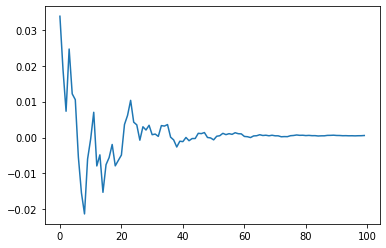

In [25]:
plt.figure()
plt.plot(model_Ar.forecast(100)[0])